In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.width', 170)

import numpy as np
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# 1. EDA

In [3]:
df_test = pd.read_csv('../input/tabular-playground-series-sep-2022/test.csv')
df_train = pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv')
samplesubmission = pd.read_csv('../input/tabular-playground-series-sep-2022/sample_submission.csv')

In [4]:
df_train.shape

(70128, 6)

In [5]:
df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [6]:
#df_train = df_train.set_index('date')
#df_train.index = pd.to_datetime(df_train.index)

#df_test = df_test.set_index('date')
#df_test.index = pd.to_datetime(df_test.index)

In [7]:
def check_df(dataframe, head=5):
    print("##################### Info #####################")
    print(dataframe.info())
    print()
    print("##################### Shape #####################")
    print(dataframe.shape)
    print()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print()
    print("##################### Head #####################")
    print(dataframe.head(head))
    print()
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print()
    print("##################### Null Values #####################")
    print(dataframe.isnull().sum())
    print()
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print()
    print("##################### Uniqueness #####################")
    print(dataframe.nunique())
    print()
    print("##################### Statistics #####################")
    print(dataframe.describe()) #statistics for numeric columns
    print()
    print("##################### Duplicates #####################")
    print(dataframe.duplicated().sum()) # No of duplicates in the dataset
    print()

In [8]:
check_df(df_train, head=5)

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB
None

##################### Shape #####################
(70128, 6)

##################### Types #####################
row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

##################### Head #####################
   row_id        date  country       store                           product  num_sold
0       0  2017-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques       663
1       1  2017-01-

In [9]:
df_train['date'] = pd.to_datetime(df_train['date'], format = '%Y-%m-%d')
df_test['date'] = pd.to_datetime(df_test['date'], format = '%Y-%m-%d')

In [10]:
df_train.sample(10).sort_values('row_id')

,row_id,date,country,store,product,num_sold
3531,3531,2017-03-15,Italy,KaggleMart,Kaggle for Kids: One Smart Goose,280
4334,4334,2017-04-01,France,KaggleRama,Kaggle Recipe Book,69
12549,12549,2017-09-19,Germany,KaggleRama,Kaggle Getting Started,122
17457,17457,2017-12-30,Poland,KaggleMart,Kaggle Getting Started,213
20674,20674,2018-03-07,Poland,KaggleMart,Kaggle Recipe Book,76
21787,21787,2018-03-30,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,282
25347,25347,2018-06-13,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,465
39682,39682,2019-04-07,Poland,KaggleMart,Kaggle Recipe Book,90
44062,44062,2019-07-07,Spain,KaggleRama,Kaggle Recipe Book,52
47199,47199,2019-09-11,France,KaggleRama,Kaggle for Kids: One Smart Goose,119


In [11]:
#Checking missing values
df_train.isnull().sum(axis=0)

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [12]:
#Estimating Skewness and Kurtosis
#df_train.skew()
#df_train.kurt()

In [13]:
df_train['product'].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [14]:
df_train['store'].value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [15]:
pd.crosstab(df_train['country'], df_train['store'])

store,KaggleMart,KaggleRama
country,,
Belgium,5844,5844
France,5844,5844
Germany,5844,5844
Italy,5844,5844
Poland,5844,5844
Spain,5844,5844


### 1.2. Graphs

Skewness: 0.901632
Kurtosis: 0.113923


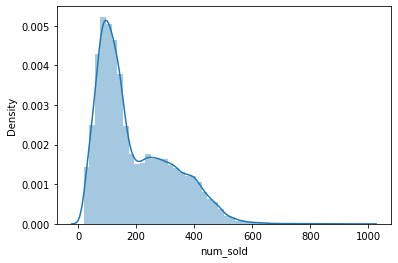

In [16]:
#histogram
sns.distplot(df_train['num_sold']);

#skewness and kurtosis
print("Skewness: %f" % df_train['num_sold'].skew())
print("Kurtosis: %f" % df_train['num_sold'].kurt())

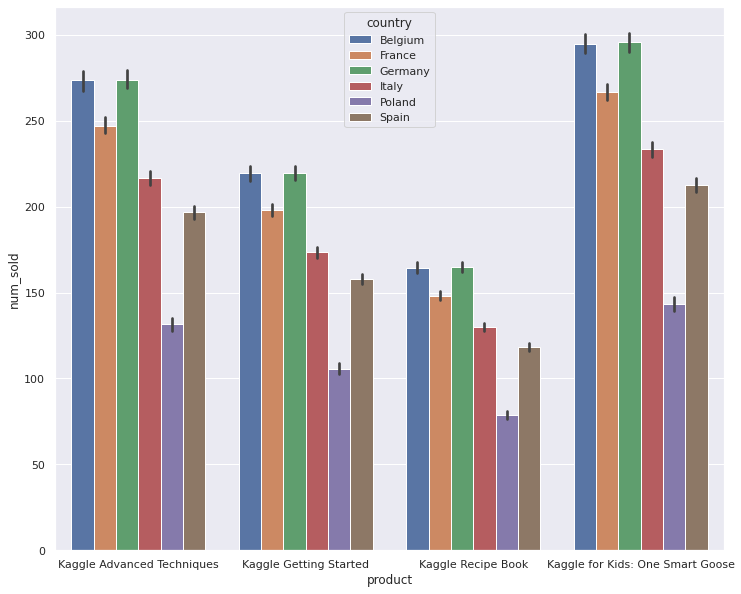

In [17]:
sns.set(rc={"figure.figsize":(12, 10)})
ax = sns.barplot(data=df_train, x='product', y='num_sold', hue='country')


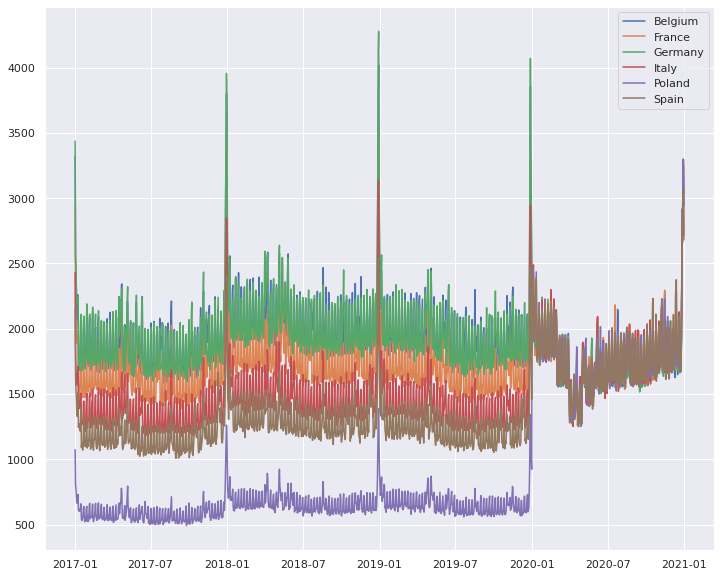

<Figure size 720x288 with 0 Axes>

In [18]:
for country in df_train['country'].unique():
    filt_train = df_train[df_train['country'] == country]

    train_temp = filt_train.groupby('date').sum().reset_index()
    
    plt.plot(train_temp['date'], train_temp['num_sold'], label=country)
plt.legend()
plt.figure(figsize=(10,4))
plt.show()

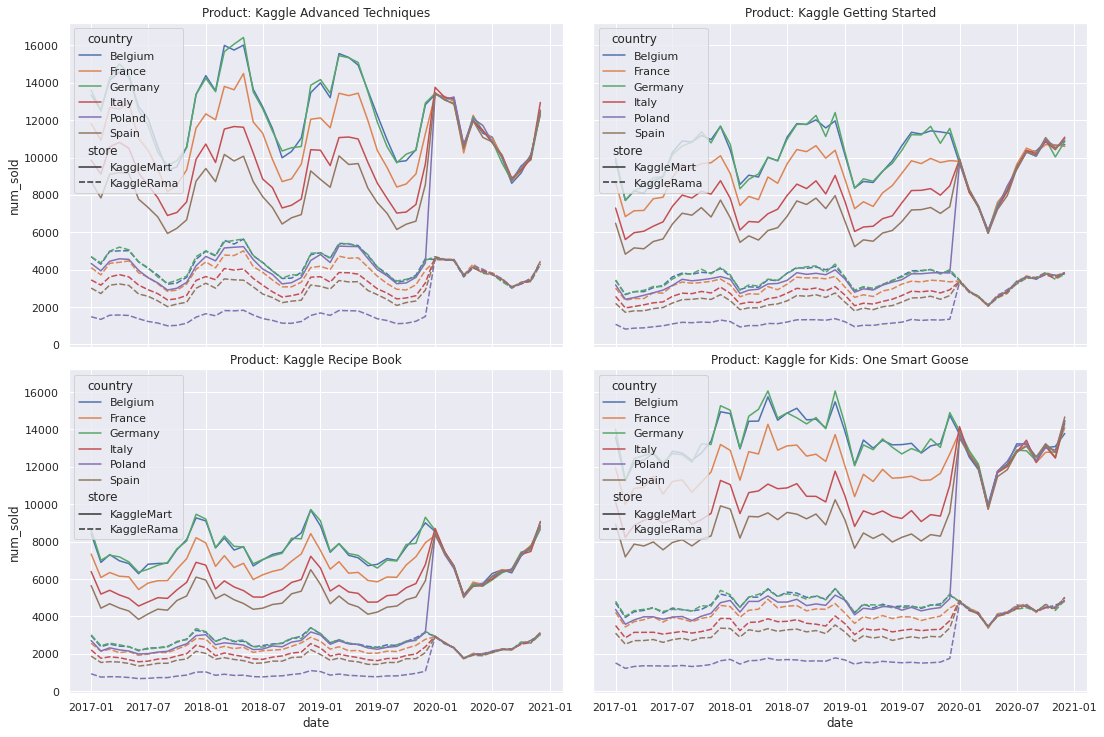

In [19]:
monthly_df = df_train.groupby(["country","store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

def plot_all(df):
    f,axes = plt.subplots(2,2,figsize=(15,10), sharex = True, sharey=True)
    f.tight_layout()
    for n,prod in enumerate(df["product"].unique()):
        plot_df = df.loc[df["product"] == prod]
        sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=axes[n//2,n%2])
        axes[n//2,n%2].set_title("Product: "+str(prod))
        
plot_all(monthly_df)


product,date,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose
0,2017-01-01,4267,3492,2900,4693
1,2017-01-02,3242,2597,2119,3620
2,2017-01-03,3173,2463,2022,3226
3,2017-01-04,2948,2354,1998,3145
4,2017-01-05,2773,2232,1787,3003


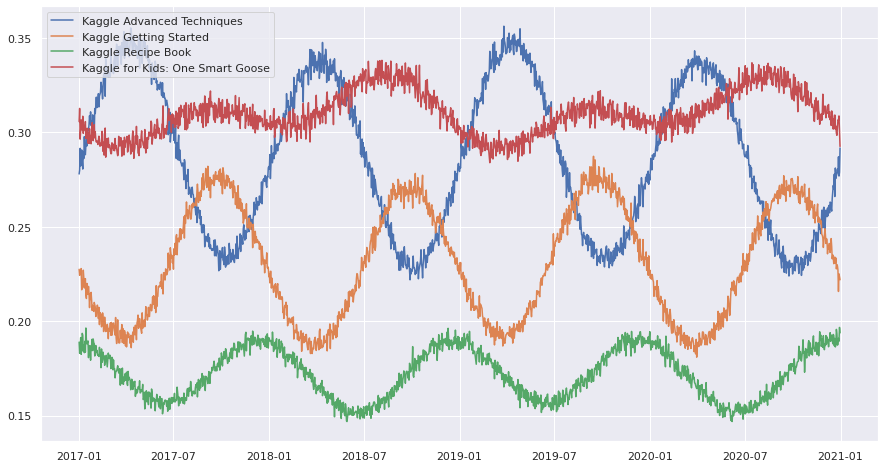

In [20]:
plt.figure(figsize=(15,8))
train_by_store = df_train.groupby(['date', 'store']).sum().reset_index().pivot(index='date', columns='store', values='num_sold').reset_index()
train_by_product = df_train.groupby(['date', 'product']).sum().reset_index().pivot(index='date', columns='product', values='num_sold').reset_index()
display(train_by_product.head())

for product in df_train['product'].unique():
    train_by_product['ratio{}'.format(product)] = train_by_product[product]/(train_by_product[df_train['product'].unique()].sum(axis=1))
    plt.plot(train_by_store['date'], train_by_product['ratio{}'.format(product)], label=product)

plt.legend()
plt.show()

,date,num_sold,year
0,2017-01-01,15352,2017
1,2017-01-02,11578,2017
2,2017-01-03,10884,2017
3,2017-01-04,10445,2017
4,2017-01-05,9795,2017


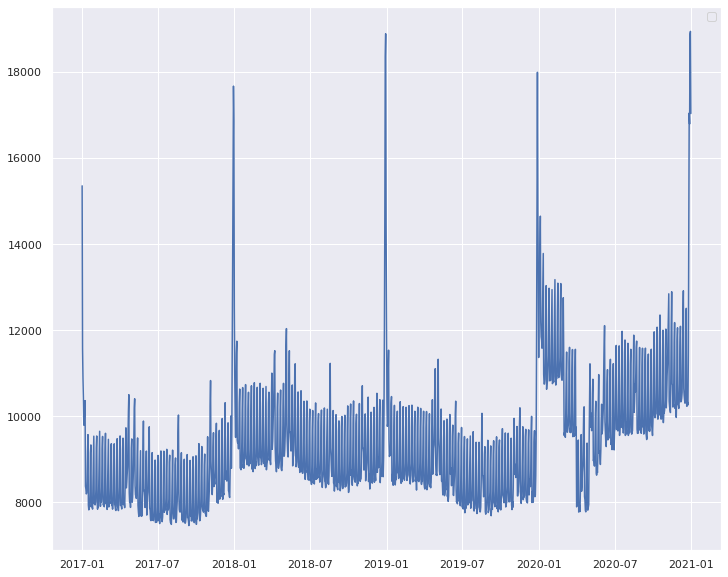

In [21]:
# The first half of 2020 is excluded because it is an outlier.
train_gp = df_train.groupby('date').sum().reset_index()[['date', 'num_sold']]
train_gp['year'] = df_train['date'].dt.year

train_gp = train_gp[~((train_gp['year'] == 2020) & (train_gp['date'].dt.month >= 1) & (train_gp['date'].dt.month <= 7))]

# For linear regression models, one hot encoding
display(train_gp.head())
plt.plot(train_gp['date'], train_gp['num_sold'])
plt.legend()
plt.show()

In [22]:
def plot_by_country(country):

    data_temp_1 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleMart') & (df_train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
    data_temp_2 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleMart') & (df_train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
    data_temp_3 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleMart') & (df_train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
    data_temp_4 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleMart') & (df_train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

    data_temp_5 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleRama') & (df_train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
    data_temp_6 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleRama') & (df_train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
    data_temp_7 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleRama') & (df_train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
    data_temp_8 = df_train[(df_train['country'] == country) & (df_train['store'] == 'KaggleRama') & (df_train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

    fig, axes = plt.subplots(4, 2, figsize = (15, 20))

    sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
    sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
    sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
    sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
    sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
    sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
    sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
    sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

    plt.show();

#### 1.2.1. Belgium

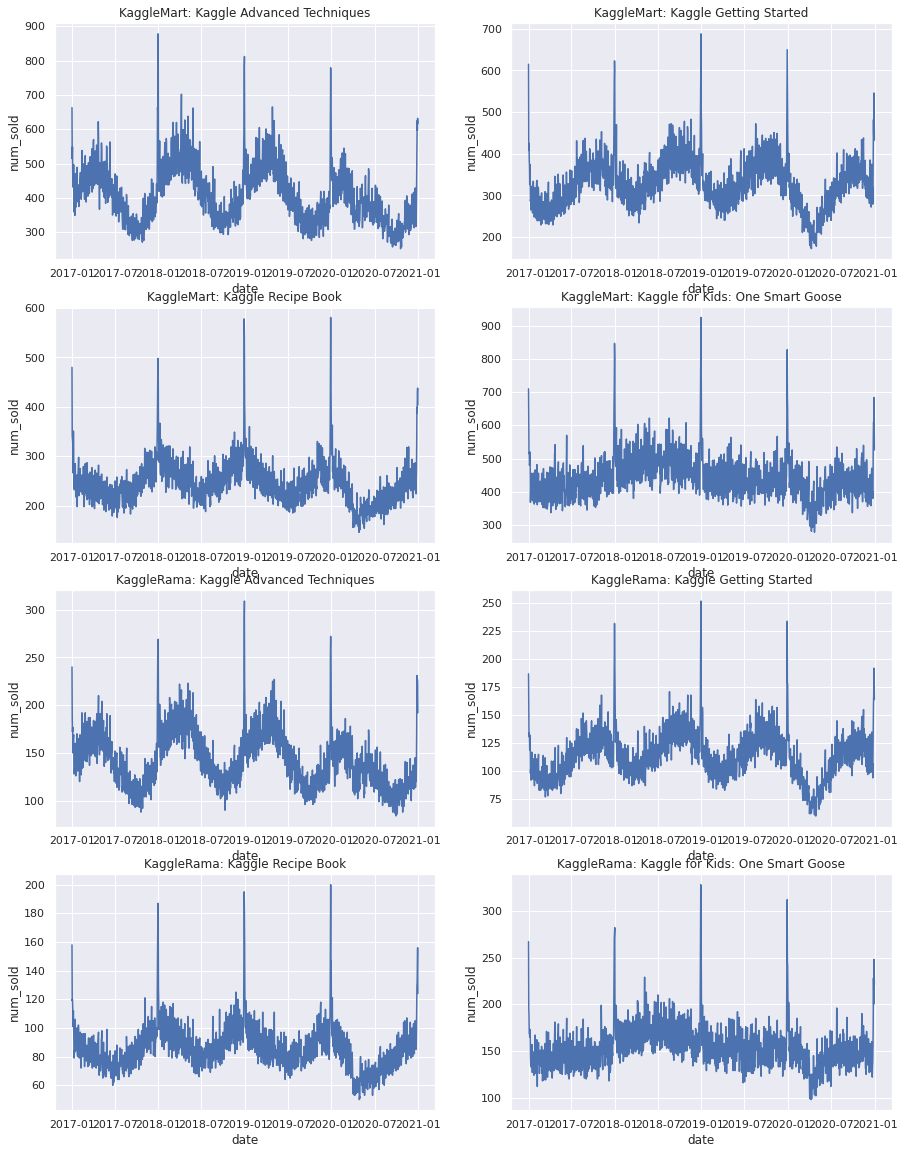

In [23]:
plot_by_country('Belgium')

#### 1.2.2 France

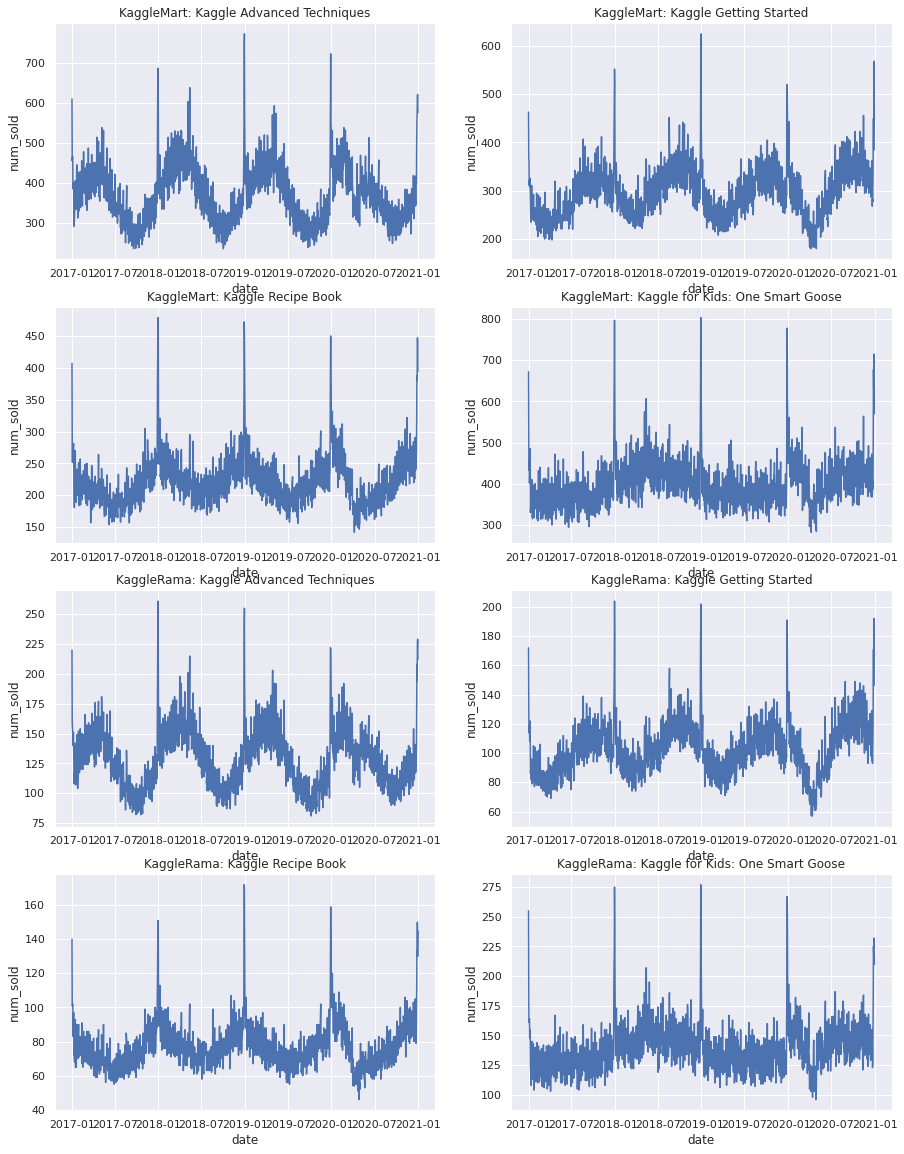

In [24]:
plot_by_country('France')

#### 1.2.3 Germany

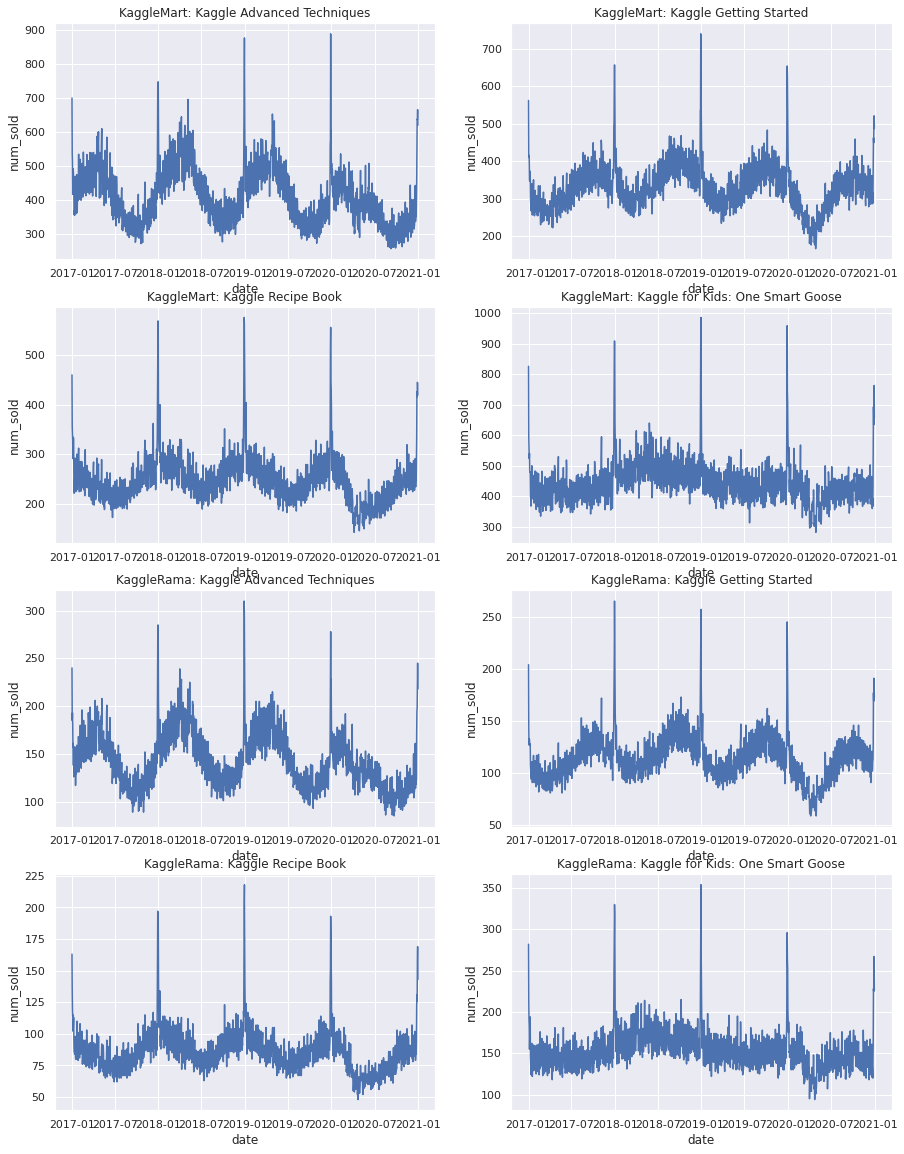

In [25]:
plot_by_country('Germany')

#### 1.2.4 Italy

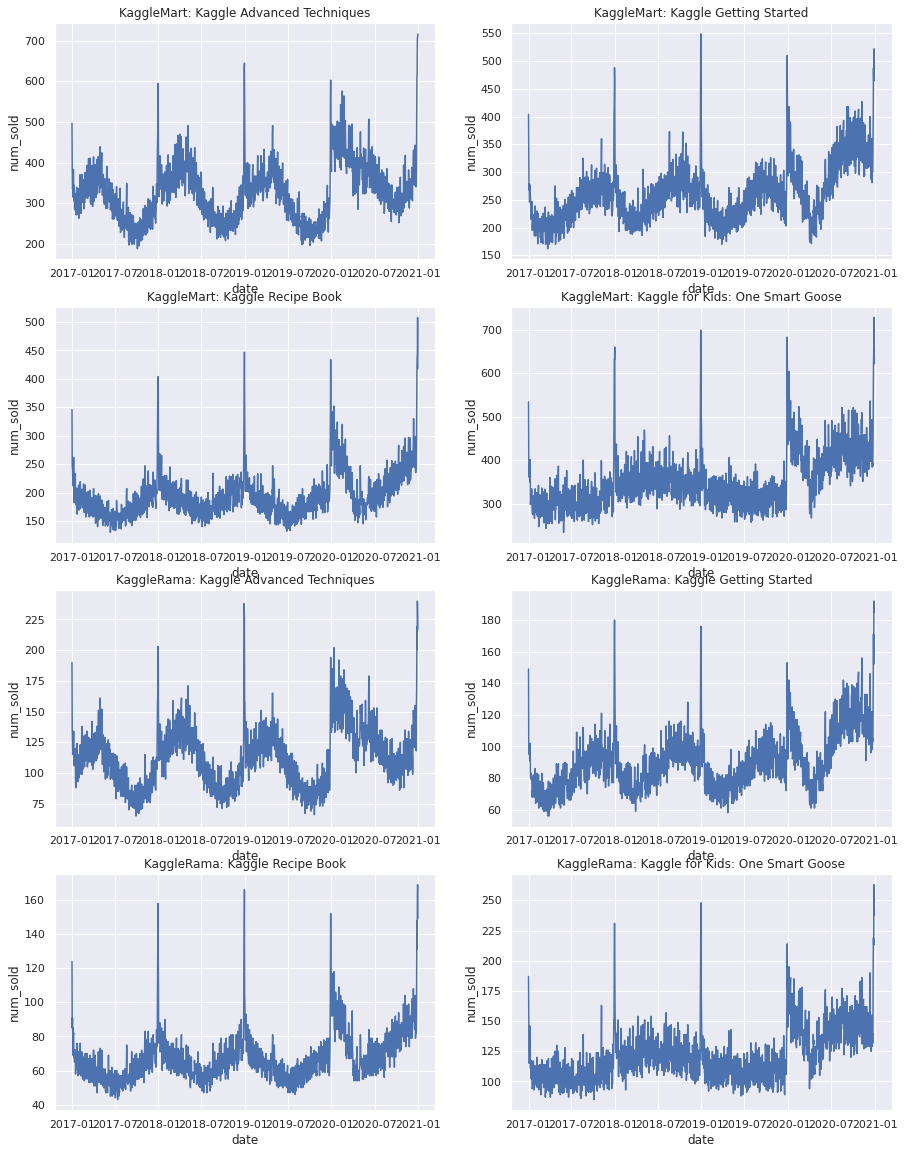

In [26]:
plot_by_country('Italy')

#### 1.2.5 Poland

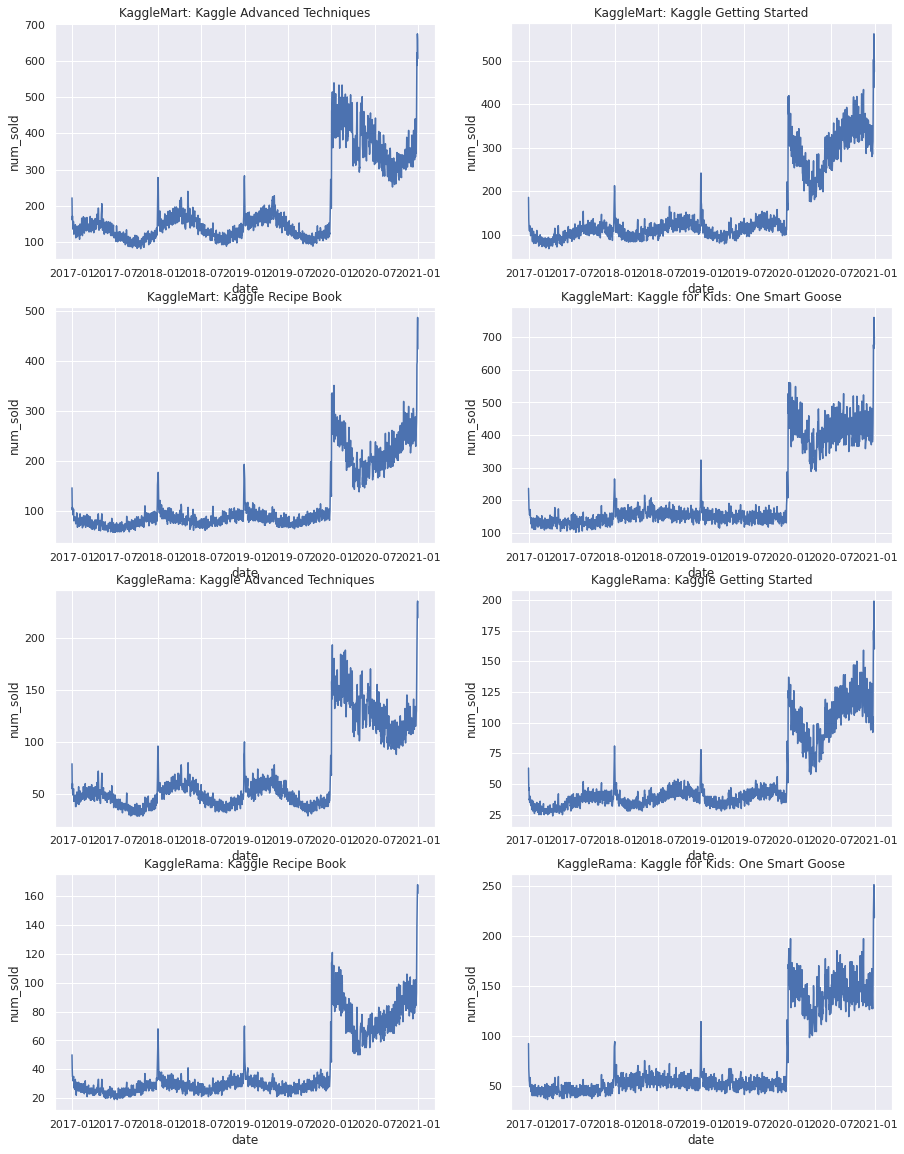

In [27]:
plot_by_country('Poland')

#### 1.2.6 Spain

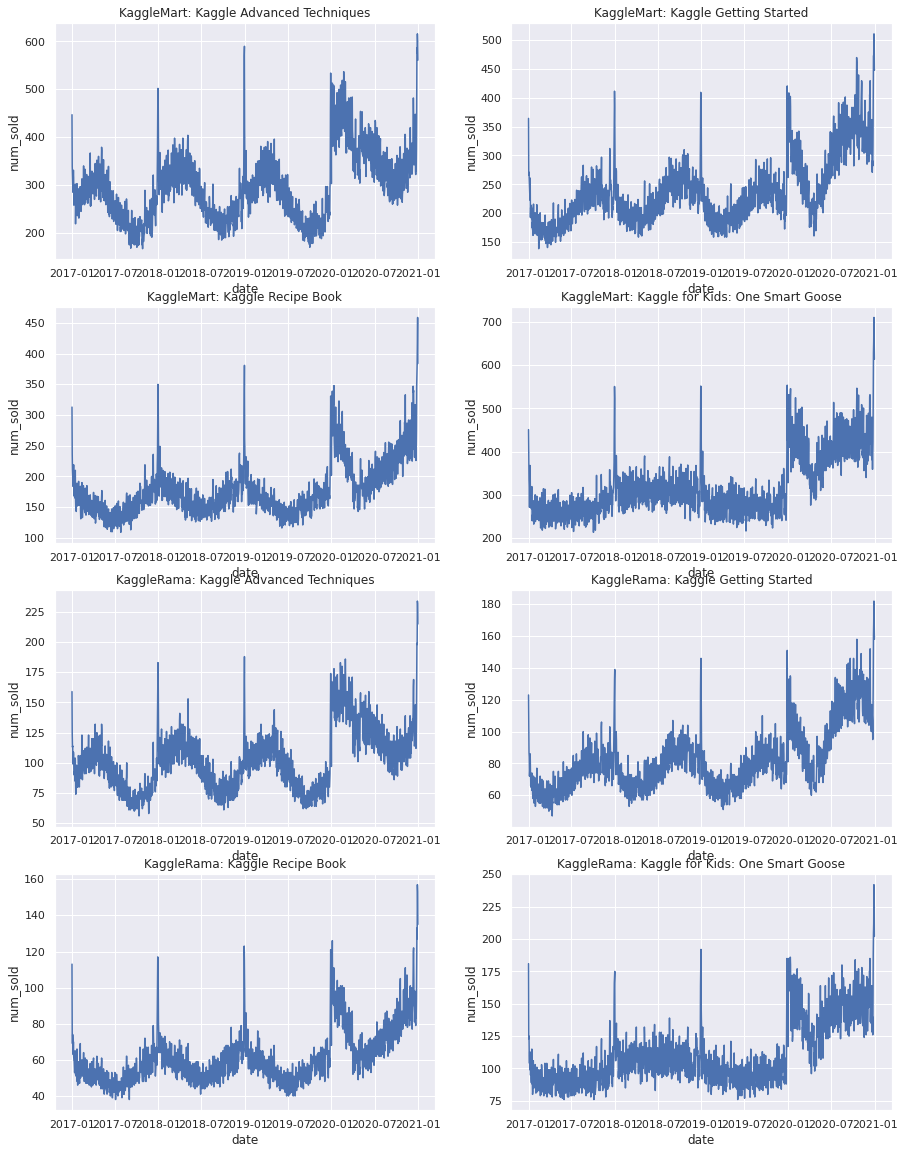

In [28]:
plot_by_country('Spain')

# 2. Data Prep

In [29]:
original_train_df = df_train.copy()

In [30]:
country_weights = df_train.loc[df_train["date"] < "2020-01-01"].groupby("country")["num_sold"].sum()/df_train.loc[df_train["date"] < "2020-01-01", "num_sold"].sum()
country_weights

country
Belgium   0
France    0
Germany   0
Italy     0
Poland    0
Spain     0
Name: num_sold, dtype: float64

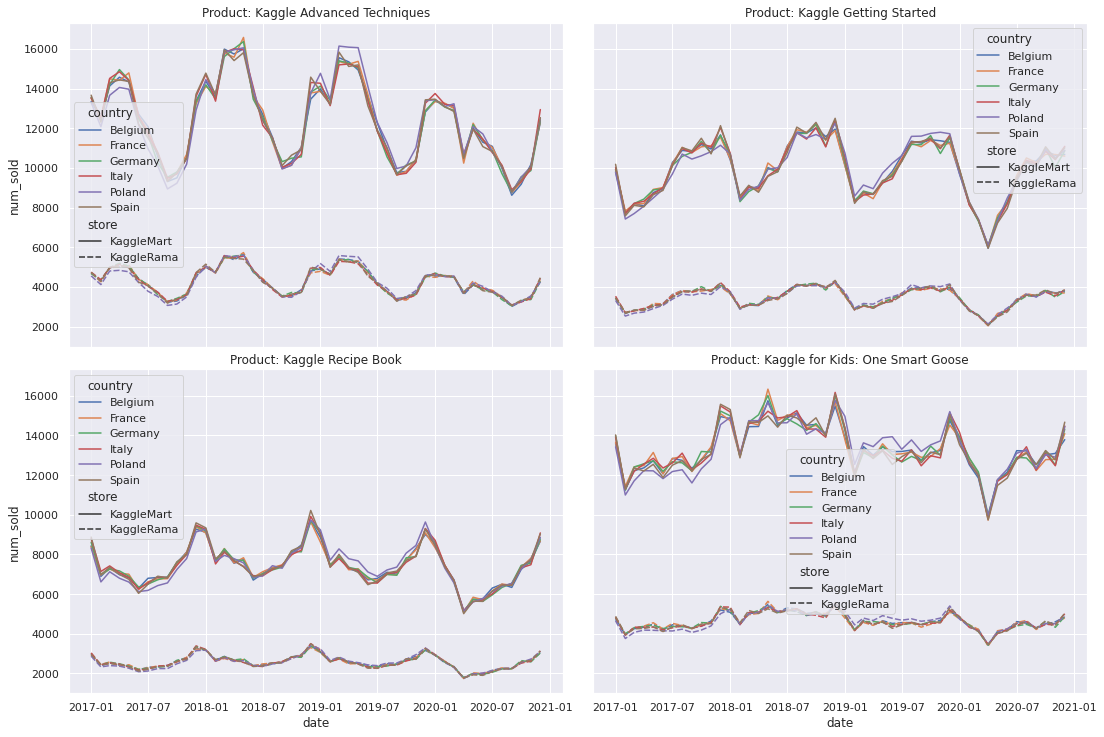

In [31]:
def plot_adjust_country(df):
    new_df = df.copy()
    
    weights = country_weights.loc["Belgium"] / country_weights
    
    for country in weights.index:
        new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] *  weights[country]
    #plot_country_product(new_df)
    plot_all(new_df)
    
plot_adjust_country(monthly_df)


In [32]:
product_df = df_train.groupby(["date","product"])["num_sold"].sum().reset_index()

product_ratio_df = product_df.pivot(index="date", columns="product", values="num_sold")
product_ratio_df = product_ratio_df.apply(lambda x: x/x.sum(),axis=1)
product_ratio_df = product_ratio_df.stack().rename("ratios").reset_index()
product_ratio_df.head(4)

,date,product,ratios
0,2017-01-01,Kaggle Advanced Techniques,0
1,2017-01-01,Kaggle Getting Started,0
2,2017-01-01,Kaggle Recipe Book,0
3,2017-01-01,Kaggle for Kids: One Smart Goose,0


In [33]:
df_train = df_train.groupby(["date"])["num_sold"].sum().reset_index()

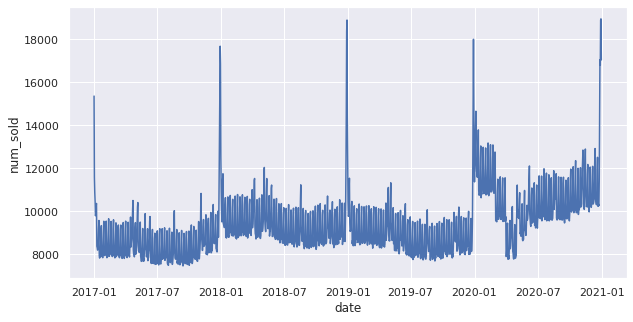

In [34]:
f,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_train, x="date", y="num_sold");

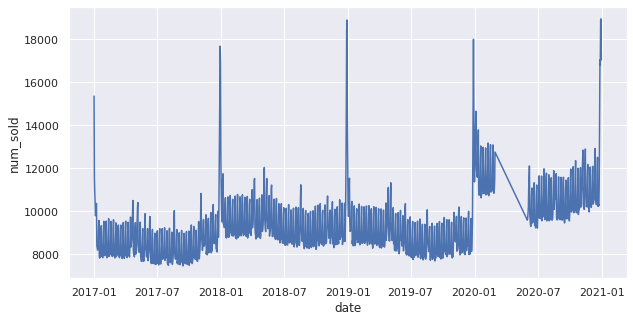

In [35]:
train_nocovid_df = df_train.loc[~((df_train["date"] >= "2020-03-01") & (df_train["date"] < "2020-06-01"))]
f,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = train_nocovid_df, x="date", y="num_sold");

In [36]:
df_train = train_nocovid_df

#get the dates to forecast for
test_all_df = df_test.groupby(["date"])["row_id"].first().reset_index().drop(columns="row_id")
#keep dates for later
test_all_df_dates = test_all_df[["date"]]

In [37]:
def feature_engineer(df):
    new_df = df.copy()
    new_df["month"] = df["date"].dt.month
    new_df["month_sin"] = np.sin(new_df['month'] * (2 * np.pi / 12))
    new_df["month_cos"] = np.cos(new_df['month'] * (2 * np.pi / 12))
        
    new_df["day_of_week"] = df["date"].dt.dayofweek
    new_df["day_of_week"] = new_df["day_of_week"].apply(lambda x: 0 if x<=3 else(1 if x==4 else (2 if x==5 else (3))))
    
    new_df["day_of_year"] = df["date"].dt.dayofyear
    #account for leap year
    new_df["day_of_year"] = new_df.apply(lambda x: x["day_of_year"]-1 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  else x["day_of_year"], axis=1)
    new_df["important_dates"] = new_df["day_of_year"].apply(lambda x: x if x in [1,2,3,4,5,6,7,8,125,126,285,360,361,362,363,364,365] else 0)
    
    
    new_df["year"] = df["date"].dt.year
    new_df = new_df.drop(columns=["date","month","day_of_year"])
    
    new_df = pd.get_dummies(new_df, columns = ["important_dates","day_of_week"], drop_first=True)
    
    return new_df

In [38]:
train_all_df = feature_engineer(df_train)
test_all_df = feature_engineer(test_all_df)

## 3.Modeling

In [39]:
y = train_all_df["num_sold"]
X = train_all_df.drop(columns="num_sold")
X_test = test_all_df

In [40]:
from sklearn.linear_model import Ridge

model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(X, y)
preds = model.predict(X_test)
test_all_df_dates["num_sold"] = preds

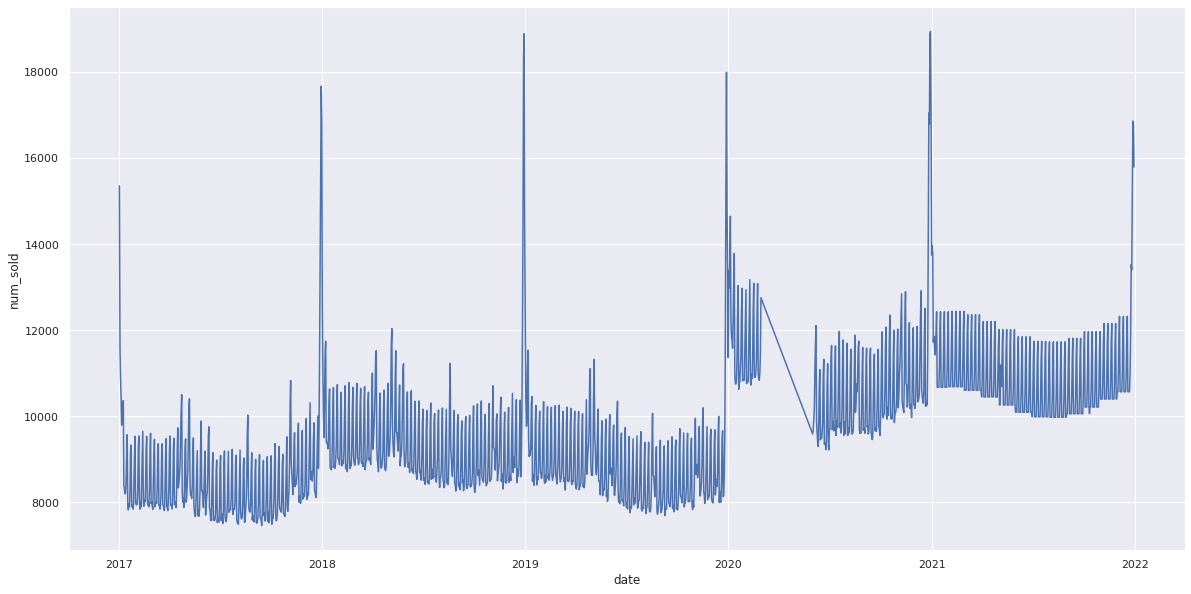

In [41]:
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = pd.concat([df_train,test_all_df_dates]).reset_index(drop=True), x="date", y="num_sold");

In [42]:
product_ratio_2019 = product_ratio_df.loc[product_ratio_df["date"].dt.year == 2019].copy()
product_ratio_2019["mm-dd"] = product_ratio_2019["date"].dt.strftime('%m-%d')
product_ratio_2019 = product_ratio_2019.drop(columns="date")

test_product_ratio_df = df_test.copy()
test_product_ratio_df["mm-dd"] = test_product_ratio_df["date"].dt.strftime('%m-%d')

test_product_ratio_df = pd.merge(test_product_ratio_df,product_ratio_2019, how="left", on = ["mm-dd","product"])
test_product_ratio_df.head()

,row_id,date,country,store,product,mm-dd,ratios
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,01-01,0
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,01-01,0
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,01-01,0
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,01-01,0
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,01-01,0


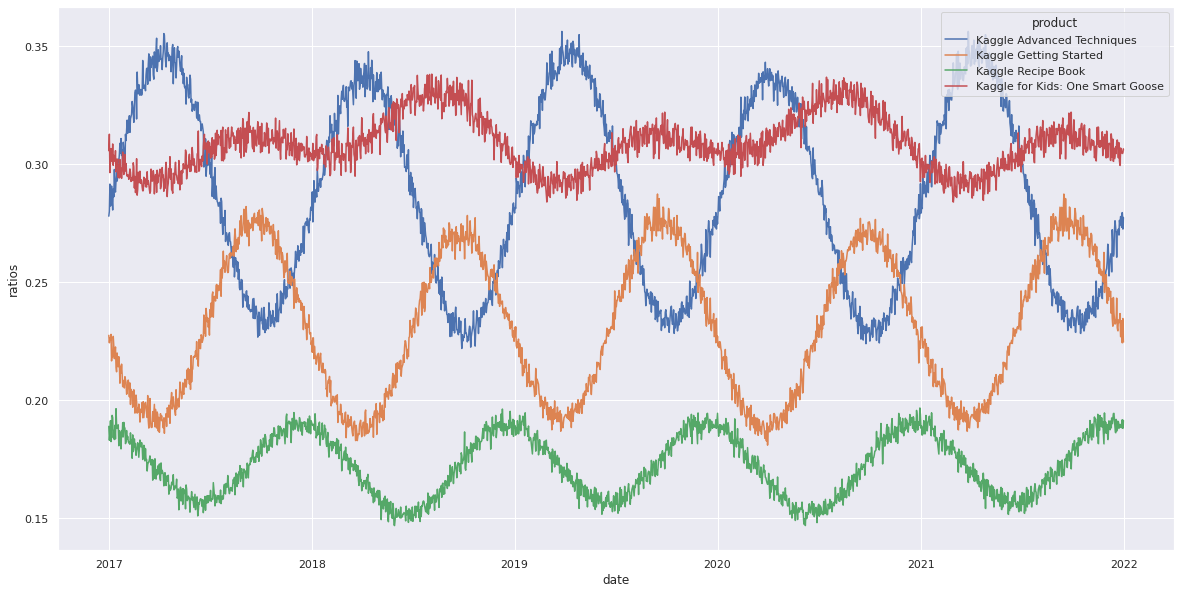

In [43]:
temp_df = pd.concat([product_ratio_df,test_product_ratio_df]).reset_index(drop=True)
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=temp_df, x="date", y="ratios", hue="product");

In [44]:
test_sub_df = pd.merge(df_test, test_all_df_dates, how="left")
test_sub_df["ratios"] = test_product_ratio_df["ratios"]
test_sub_df.head()

,row_id,date,country,store,product,num_sold,ratios
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,13745,0
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,13745,0
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,13745,0
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,13745,0
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,13745,0


In [45]:
def disaggregate_forecast(df):
    new_df = df.copy()
    
    store_weights = original_train_df.groupby("store")["num_sold"].sum()/original_train_df["num_sold"].sum()
    country_weights = pd.Series(index = test_sub_df["country"].unique(),data = 1/6)

    for country in country_weights.index:
        new_df.loc[(new_df["country"] == country), "num_sold"] = new_df.loc[(new_df["country"] == country), "num_sold"] *  country_weights[country]
        
    for store in store_weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights[store]
    
    #apply product weights (which is dependent on date)
    new_df["num_sold"] = new_df["num_sold"] * new_df["ratios"]
    new_df["num_sold"] = new_df["num_sold"].round()
    new_df = new_df.drop(columns=["ratios"])
    
    return new_df

In [46]:
final_df = disaggregate_forecast(test_sub_df) 
final_df

,row_id,date,country,store,product,num_sold
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,475
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,393
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,320
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,513
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,165
...,...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,599
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,188
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,152
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,130


In [47]:
def plot_all(df):
    f,axes = plt.subplots(2,2,figsize=(20,15), sharex = True, sharey=True)
    f.tight_layout()
    for n,prod in enumerate(df["product"].unique()):
        plot_df = df.loc[df["product"] == prod]
        sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=axes[n//2,n%2])
        axes[n//2,n%2].set_title("Product: "+str(prod))

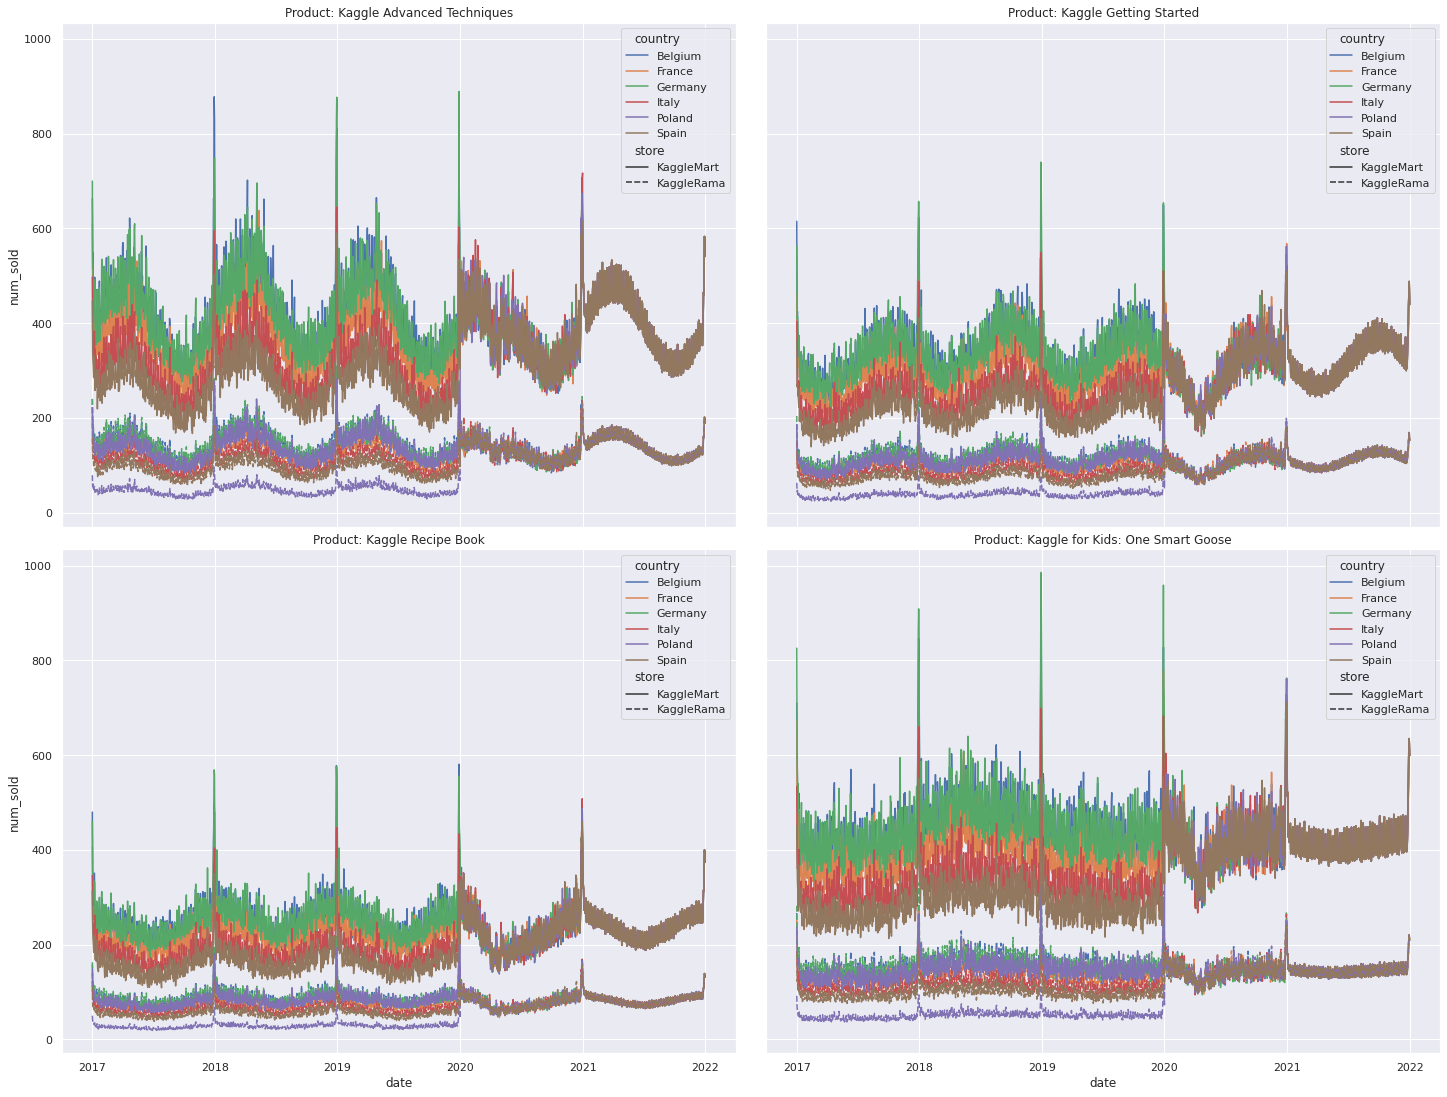

In [48]:
plot_all(pd.concat([original_train_df,final_df]).reset_index(drop=True))

In [49]:
submission = pd.read_csv("../input/tabular-playground-series-sep-2022/sample_submission.csv")
#submission["num_sold"] = final_df["num_sold"]

In [50]:
#submission.to_csv('submission.csv', index = False)

### EXTRA - LOFO Importance
LOFO (Leave One Feature Out) Importance calculates the importances of a set of features based on a metric of choice, for a model of choice, by iteratively removing each feature from the set, and evaluating the performance of the model, with a validation scheme of choice, based on the chosen metric.

In [51]:
pip install lofo-importance

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/23 [00:00<?, ?it/s]

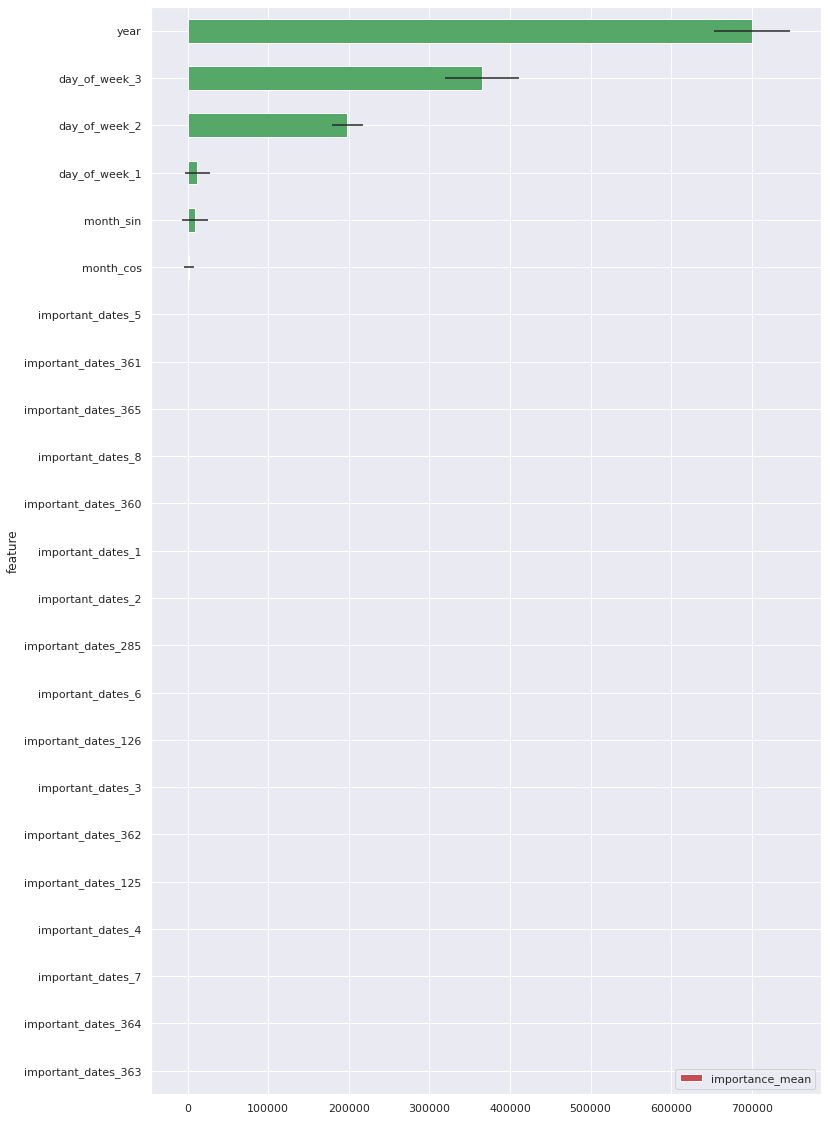

In [52]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from lofo import Dataset, LOFOImportance, plot_importance

# define the validation scheme
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=17)
#KFold(n_splits=5, shuffle=False, random_state=17)
target="num_sold"
# define the binary target and the features
dataset = Dataset(df=train_all_df, target='num_sold', features=[col for col in train_all_df.columns if col != target])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_squared_error")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

## deneme

In [53]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [54]:
from sklearn.linear_model import Ridge

y = train_all_df["num_sold"]
X = train_all_df.drop(columns="num_sold")
X_test = test_all_df

model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(X, y)
preds = model.predict(X_test)
test_all_df_dates["num_sold"] = preds

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=17) # 0.25 x 0.8 = 0.2

In [56]:
datasets = {'x_train': X_train,
            'y_train': y_train,
            'x_val': X_val,
            'y_val': y_val,
            'x_test': X_test
            } 

def pred_model(model, **datasets):
    pred_val = model.predict(datasets['x_val'])
    pred_val = pd.DataFrame(pred_val, index=datasets['x_val'].index, columns=['pred'])
    
    pred_test = model.predict(datasets['x_test'])

    return pred_test , pred_val

In [57]:
from sklearn.metrics import mean_squared_error
import optuna

lgbm_model = LGBMRegressor(random_state=46)

def objective_lgb(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.25, log=True)
    reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
    reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    subsample = trial.suggest_float("subsample", 0.0001, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.0001, 1.0)
    max_depth = trial.suggest_int("max_depth", 1, 100)
    #early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 10, 70)
    n_estimators = trial.suggest_int("n_estimators", 250, 10000)
    
    model = LGBMRegressor(
        random_state=50,
        #tree_method="gpu_hist",
        #gpu_id=0,
        #predictor="gpu_predictor",
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_depth=max_depth,

    )
    model.fit(
        datasets['x_train'],
        datasets['y_train'],
        early_stopping_rounds=2000,
        eval_set=[(datasets['x_val'], datasets['y_val'])],
        verbose=1200,
    )
    preds_valid = model.predict(datasets['x_val'])
    rmse = mean_squared_error(datasets['y_val'], preds_valid, squared=False)
    #f1_score_lgb_val= f1_score(datasets['y_val'], preds_valid, average=None)

    return rmse

study_lgb = optuna.create_study(direction="minimize")
study_lgb.optimize(objective_lgb, n_trials=10)

[I 2022-09-09 11:11:04,532] A new study created in memory with name: no-name-f7f451af-c10e-4b2f-b987-a08f6fbc5a08


[1200]	valid_0's l2: 754353


[I 2022-09-09 11:11:05,528] Trial 0 finished with value: 776.5183728687891 and parameters: {'learning_rate': 0.08902619029395396, 'reg_lambda': 0.6088613685256291, 'reg_alpha': 8.012187845661858, 'subsample': 0.5103433627063017, 'colsample_bytree': 0.5019359210910822, 'max_depth': 71, 'n_estimators': 8661}. Best is trial 0 with value: 776.5183728687891.


[1200]	valid_0's l2: 1.53572e+06
[2400]	valid_0's l2: 1.28252e+06
[3600]	valid_0's l2: 1.10095e+06


[I 2022-09-09 11:11:06,400] Trial 1 finished with value: 1019.6151163867096 and parameters: {'learning_rate': 0.0011207686779365754, 'reg_lambda': 96.83779721808847, 'reg_alpha': 0.0025039722462637808, 'subsample': 0.18487938251785394, 'colsample_bytree': 0.12672069581970666, 'max_depth': 68, 'n_estimators': 4147}. Best is trial 0 with value: 776.5183728687891.


[1200]	valid_0's l2: 622690
[2400]	valid_0's l2: 655489


[I 2022-09-09 11:11:08,274] Trial 2 finished with value: 775.7961017791847 and parameters: {'learning_rate': 0.0054436483800401995, 'reg_lambda': 0.008266515745959395, 'reg_alpha': 35.176127177274715, 'subsample': 0.6068708395517897, 'colsample_bytree': 0.8450758573012102, 'max_depth': 57, 'n_estimators': 5627}. Best is trial 2 with value: 775.7961017791847.


[1200]	valid_0's l2: 578094
[2400]	valid_0's l2: 578094


[I 2022-09-09 11:11:08,779] Trial 3 finished with value: 760.3249620722509 and parameters: {'learning_rate': 0.12219355690283935, 'reg_lambda': 0.07906098533134763, 'reg_alpha': 0.011917927459348604, 'subsample': 0.20672221187667633, 'colsample_bytree': 0.1685772423732146, 'max_depth': 45, 'n_estimators': 3432}. Best is trial 3 with value: 760.3249620722509.
[I 2022-09-09 11:11:08,949] Trial 4 finished with value: 781.5051552652749 and parameters: {'learning_rate': 0.02217724402663558, 'reg_lambda': 5.609993279036371e-08, 'reg_alpha': 2.2230413479574604, 'subsample': 0.43944399432813736, 'colsample_bytree': 0.038489350502534145, 'max_depth': 18, 'n_estimators': 620}. Best is trial 3 with value: 760.3249620722509.


[1200]	valid_0's l2: 1.83248e+06
[2400]	valid_0's l2: 1.75427e+06
[3600]	valid_0's l2: 1.68075e+06
[4800]	valid_0's l2: 1.61339e+06


[I 2022-09-09 11:11:10,221] Trial 5 finished with value: 1269.4764952781843 and parameters: {'learning_rate': 0.00014659062147008597, 'reg_lambda': 5.0774387492924345e-06, 'reg_alpha': 0.000887159379542258, 'subsample': 0.23665407182504747, 'colsample_bytree': 0.11475663488752394, 'max_depth': 80, 'n_estimators': 4832}. Best is trial 3 with value: 760.3249620722509.


[1200]	valid_0's l2: 615458


[I 2022-09-09 11:11:11,936] Trial 6 finished with value: 774.9343156056249 and parameters: {'learning_rate': 0.0018518163940166455, 'reg_lambda': 2.8594756001798643e-05, 'reg_alpha': 1.2262801401368292e-07, 'subsample': 0.35918651986385436, 'colsample_bytree': 0.9081386025770464, 'max_depth': 85, 'n_estimators': 2054}. Best is trial 3 with value: 760.3249620722509.
[I 2022-09-09 11:11:12,629] Trial 7 finished with value: 775.4194912663243 and parameters: {'learning_rate': 0.2328465366572272, 'reg_lambda': 0.0012768878148217094, 'reg_alpha': 6.355675811773563, 'subsample': 0.28414162530764603, 'colsample_bytree': 0.6965474861232069, 'max_depth': 29, 'n_estimators': 9791}. Best is trial 3 with value: 760.3249620722509.


[1200]	valid_0's l2: 902301


[I 2022-09-09 11:11:13,651] Trial 8 finished with value: 775.1416499885098 and parameters: {'learning_rate': 0.009476570949846866, 'reg_lambda': 0.08273438504781652, 'reg_alpha': 3.297880051884465e-05, 'subsample': 0.4624739074716903, 'colsample_bytree': 0.7551202048385344, 'max_depth': 39, 'n_estimators': 1413}. Best is trial 3 with value: 760.3249620722509.


[1200]	valid_0's l2: 650676
[1200]	valid_0's l2: 693402


[I 2022-09-09 11:11:14,723] Trial 9 finished with value: 768.8775836253101 and parameters: {'learning_rate': 0.05071533637681804, 'reg_lambda': 7.646934391383045, 'reg_alpha': 8.357964237786742e-07, 'subsample': 0.8475663009508559, 'colsample_bytree': 0.5677519262614322, 'max_depth': 74, 'n_estimators': 2601}. Best is trial 3 with value: 760.3249620722509.


In [58]:
study_lgb.best_params

{'learning_rate': 0.12219355690283935,
 'reg_lambda': 0.07906098533134763,
 'reg_alpha': 0.011917927459348604,
 'subsample': 0.20672221187667633,
 'colsample_bytree': 0.1685772423732146,
 'max_depth': 45,
 'n_estimators': 3432}

In [59]:
lgbm_final = lgbm_model.set_params(**study_lgb.best_params, random_state = 17).fit(X,y)

In [60]:
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

1112.3745988316264

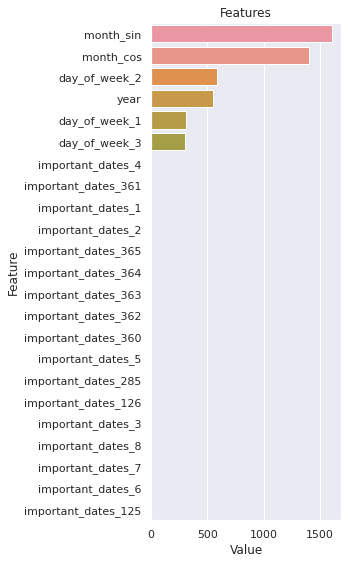

In [61]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(5, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_final, X)

In [62]:
#y = df_test['num_sold']
#X = df_test.drop(["num_sold"], axis=1)
#y_pred2 = lgbm_final.predict(X_test)

#y_pred2[y_pred2<0] = 0
#y_pred2= [float(round(pred)) for pred in y_pred2]

In [63]:
"""test_sub_df2 = pd.merge(df_test, y_pred2, how="left")
test_sub_df2["ratios"] = test_product_ratio_df["ratios"]
test_sub_df2.head()

final_df2 = disaggregate_forecast(test_sub_df2) 
final_df2"""

'test_sub_df2 = pd.merge(df_test, y_pred2, how="left")\ntest_sub_df2["ratios"] = test_product_ratio_df["ratios"]\ntest_sub_df2.head()\n\nfinal_df2 = disaggregate_forecast(test_sub_df2) \nfinal_df2'

In [64]:
"""submission = pd.read_csv("../input/tabular-playground-series-sep-2022/sample_submission.csv")
submission["num_sold"] = final_df2["num_sold"]"""

'submission = pd.read_csv("../input/tabular-playground-series-sep-2022/sample_submission.csv")\nsubmission["num_sold"] = final_df2["num_sold"]'